In [151]:
A = [0.971 0.029 0; 0.145 0.778 0.077; 0 0.508 0.492] # Probability Transition Matrix
mu = [0.1 0.55 0.35] # initial state probability matrix
E = [0.215 0.015 -0.18]' #column vector of payoff expectations - project specific

3x1 Array{Float64,2}:
  0.215
  0.015
 -0.18 

In [2]:
using QuantEcon

1-element Array{Int64,1}:
 2

In [4]:
function MarkovChain_sample(A, mu; sample_size=25)
    X = Array(Int16, sample_size)
    p_mu = DiscreteRV(vec(mu))
    X[1] = draw(p_mu)
    Pr_A = [DiscreteRV(vec(A[i,:])) for i in 1:(size(A)[1])]
    for t in 2:(sample_size)
        X[t]=QuantEcon.draw(Pr_A[X[t-1]])
    end
    return X
end


MarkovChain_sample (generic function with 1 method)

In [85]:
iaka = MarkovChain_sample(A,mu)
iaka'

1x25 Array{Int16,2}:
 3  3  3  3  2  2  2  2  2  2  2  2  1  1  1  1  1  1  1  1  1  1  1  1  1

In [152]:
function MarkovChain_simulation(ff, A, mu, E; nr_iter=100, t=25)
    X = Array(Float32,nr_iter)
    #sample_path = Array(Int16, t)
    for i in 1:nr_iter
        sample_path = ff(A,mu, sample_size= t)
        X[i] = sum([log(1+E[sample_path[i]]) for i in 1:length(sample_path) ])
    end
    return X
end    

MarkovChain_simulation (generic function with 1 method)

In [86]:
function MC_sim(ff, A, mu, E; nr_iter=10,t=25)
    X = Array(Float32,nr_iter)
    for i in 1:nr_iter
        sample_path = ff(A,mu, sample_size= t)
        X[i]=mapreduce(x->log(1+E[x]),+, sample_path)
    end
    return X
end

MC_sim (generic function with 1 method)

In [87]:
iaka = MC_sim(MarkovChain_sample, A, mu, E, nr_iter=10000);

In [88]:
function MC_sim2(ff, A, mu, E; nr_iter=10,t=25)
    X = Array(Float32,nr_iter)
    map!(y->mapreduce(x->log(1+E[x]),+, ff(A,mu, sample_size= t)), X)
    return X
end

MC_sim2 (generic function with 1 method)

In [96]:
iaka2 = MC_sim2(MarkovChain_sample, A, mu, E, nr_iter=10)

10-element Array{Float32,1}:
  1.56424 
  3.96932 
  2.82322 
  4.8686  
 -0.694482
  4.68875 
  4.8686  
  3.60961 
  2.07032 
  2.89019 

In [10]:
using PyPlot

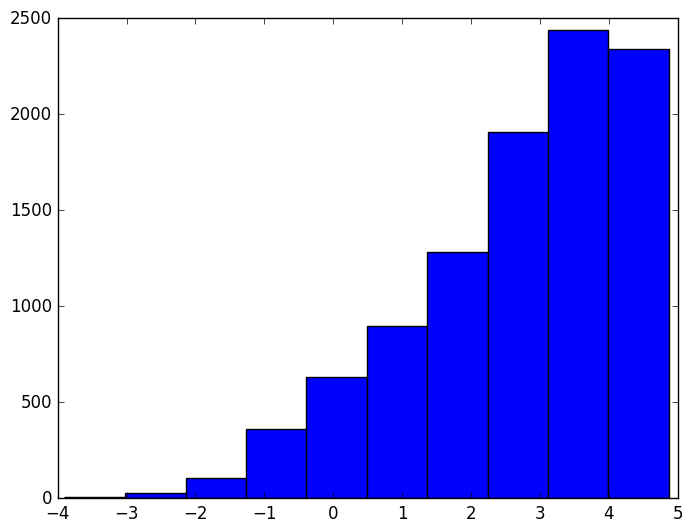

([5.0,28.0,108.0,360.0,631.0,896.0,1284.0,1907.0,2442.0,2339.0],[-3.894575595855713,-3.0182578563690186,-2.141940116882324,-1.2656223773956299,-0.38930463790893555,0.4870131015777588,1.3633308410644531,2.2396485805511475,3.115966320037842,3.992284059524536,4.8686017990112305],Any[PyObject <matplotlib.patches.Rectangle object at 0x7fac35c7a7d0>,PyObject <matplotlib.patches.Rectangle object at 0x7fac35cb5490>,PyObject <matplotlib.patches.Rectangle object at 0x7fac35c54e50>,PyObject <matplotlib.patches.Rectangle object at 0x7fac35c54e10>,PyObject <matplotlib.patches.Rectangle object at 0x7fac35c83310>,PyObject <matplotlib.patches.Rectangle object at 0x7fac35c83d50>,PyObject <matplotlib.patches.Rectangle object at 0x7fac35c83690>,PyObject <matplotlib.patches.Rectangle object at 0x7fac35c83ad0>,PyObject <matplotlib.patches.Rectangle object at 0x7fac35c54210>,PyObject <matplotlib.patches.Rectangle object at 0x7fac35c83410>])

In [11]:
h = plt[:hist](iaka,10)

In [12]:
sum(iaka.<0)

754

In [13]:
length(iaka)

10000

In [16]:
mean(iaka)

2.7183414f0

In [104]:
function MC_sim_discount(mc::Function, A, mu, E; nr_iter=10,t=25, discount=0.1)
    """
    Required:
    MC_sim_discount - Markov Chain Simulation with discount
    mc - The function that we want to simulate (ex: Markov Chain sample path )
    A - Probability Transition Matrix nxn stochastic matrix
    mu - initial state probability distribution 1xn vector
    E - expected payoff emmision probability nx1 vector
    
    Optional:
    nr_iter - Integer+
    t - number of periods in the mc function
    """
    X = Array(Float32,nr_iter)
    for i in 1:nr_iter
        MarkovChain_sample_path = mc(A,mu, sample_size= t)
        X[i]=mapreduce(x->log(1+E[x[2]])-(log(1+discount)*x[1]),+, enumerate(MarkovChain_sample_path))
    end
    return X
end

MC_sim_discount (generic function with 2 methods)

In [107]:
iaka2 = MC_sim_discount(MarkovChain_sample, A, mu, E, nr_iter=10)

10-element Array{Float32,1}:
 -28.8261
 -27.04  
 -26.4669
 -26.1072
 -26.1072
 -27.5461
 -27.7929
 -27.2533
 -30.9844
 -28.7256

In [153]:
function MC_sim_discount(mc::Function, A, mu, E; nr_iter=10,t=25, discount=0.1)
    """
    Required:
    MC_sim_discount - Markov Chain Simulation with discount
    mc - The function that we want to simulate (ex: Markov Chain sample path )
    A - Probability Transition Matrix nxn stochastic matrix
    mu - initial state probability distribution 1xn vector
    E - expected payoff emmision probability nx1 vector
    
    Optional:
    nr_iter - Integer+
    t - number of periods in the mc function
    """
    X = Array(Float32,nr_iter)
    map!(y->mapreduce(x->log(1+E[x[2]])-(log(1+discount)),+, enumerate(mc(A,mu, sample_size= t))),X)
    return X
end

MC_sim_discount (generic function with 2 methods)

In [183]:
simulation = MC_sim_discount(MarkovChain_sample, A, mu, E, nr_iter=1000000);

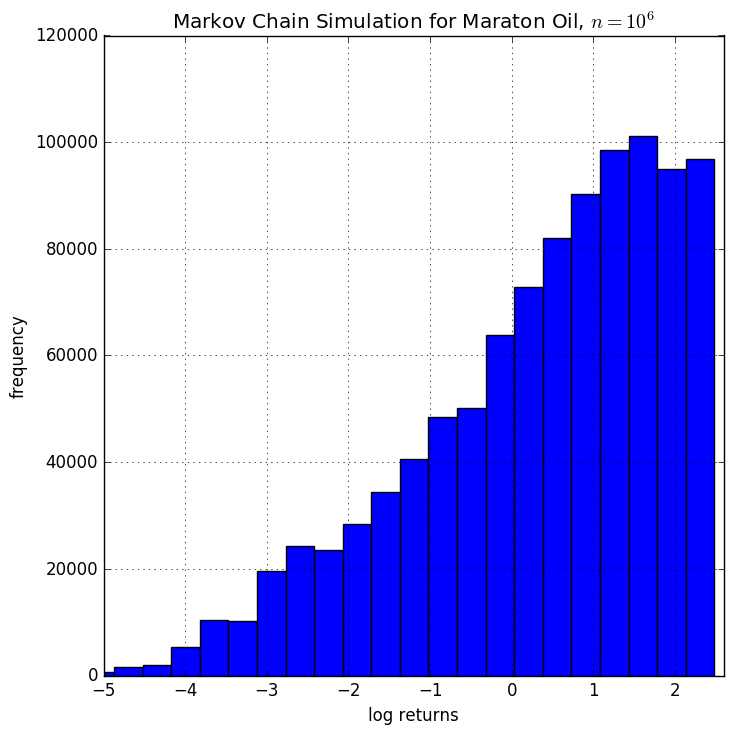

PyObject <matplotlib.text.Text object at 0x7fac2f988bd0>

In [209]:
fig = figure("pyplot_histogram",figsize=(8,8))
ax = axes()
h = plt[:hist](simulation,25)
grid("on")
xlabel("log returns")
ylabel("frequency")
ax[:set_xlim]([-5;2.6])
title("Markov Chain Simulation for Maraton Oil, \$n=10^6\$")

In [185]:
econ_payoff = map(x->exp(x)-1.0, simulation);

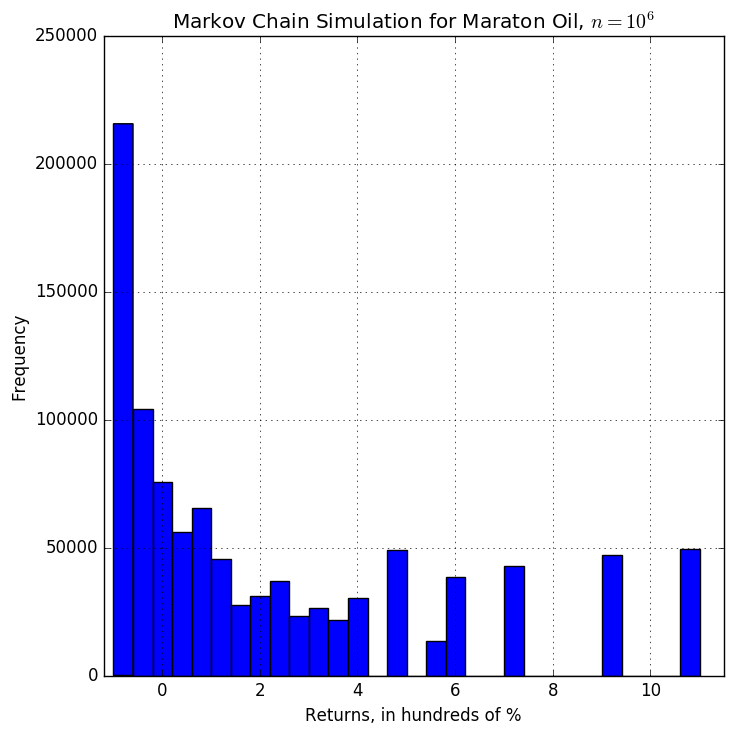

PyObject <matplotlib.text.Text object at 0x7fac2f051950>

In [217]:
fig = figure("pyplot_histogram",figsize=(8,8))
ax = axes()
h = plt[:hist](econ_payoff,30)
grid("on")
xlabel("Returns, in hundreds of \%")
ylabel("Frequency")
ax[:set_xlim]([-1.2;11.5])
title("Markov Chain Simulation for Maraton Oil, \$n=10^6\$")

In [188]:
PyPlot.plt.hist(econ_payoff,25)

LoadError: LoadError: type PyObject has no field hist
while loading In[188], in expression starting on line 1

In [244]:
function MC_sim(mc::Function, A, mu, E; nr_iter=10,t=25)
    X = Array(Float32,nr_iter)
    map!(y->mapreduce(x->log(1+E[x]),+, mc(A,mu, sample_size= t))/t,X)
    return X
end

MC_sim (generic function with 2 methods)

In [254]:
n=10^6
simulation = MC_sim(MarkovChain_sample,A, mu, E;nr_iter=n);

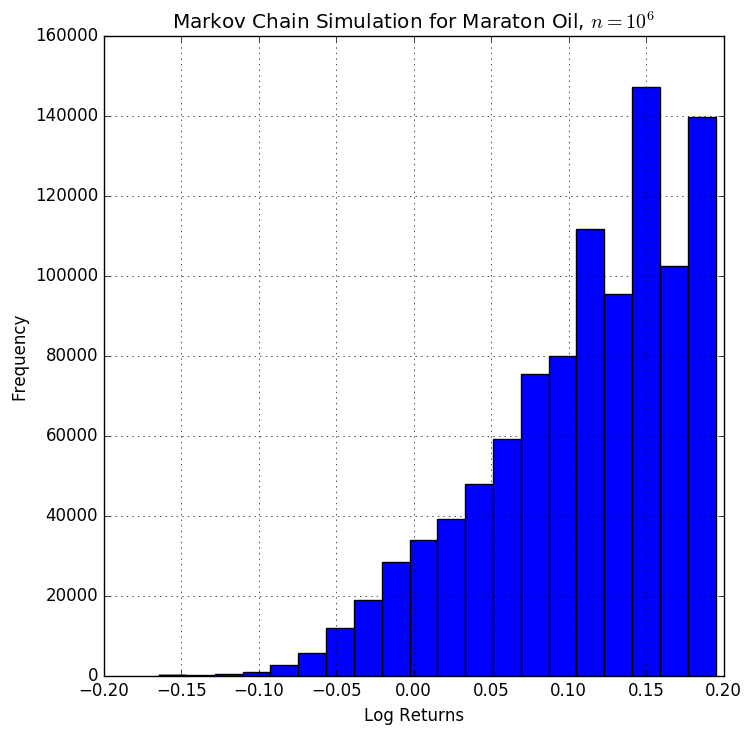

PyObject <matplotlib.text.Text object at 0x7fac2d5e59d0>

In [255]:
fig = figure("pyplot_histogram",figsize=(8,8))
ax = axes()
h = plt[:hist](simulation,20)
grid("on")
xlabel("Log Returns")
ylabel("Frequency")

title("Markov Chain Simulation for Maraton Oil, \$n=10^6\$")

In [123]:
log(1+0.13)-log(1.1)*25

-2.260536862383874

In [118]:
exp(1)

2.718281828459045

In [125]:
log(1.13)-25*log(1.1)

-2.260536862383874

In [126]:
log(1.13)

0.12221763272424911

In [127]:
1.13/1.1^25

0.10429447794008234

In [128]:
exp(log(1.13)-25*log(1.1))

0.10429447794008237

In [187]:
exp(0.12)

1.1274968515793757